#**Naïve Bayes Classifier**

The objective of this example is to predict, using the Naïve Bayes Classifier, whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

# Model explanation

Bayes' theorem is useful for finding a conditional probability of an event when another event has already occurred that affects the probability of the first event. This probability can be estimated by the following expression,

*   $P(c|x) = \frac{P(c \cap x)}{P(x)} = \frac{P(x|c) P(c)}{P(x)}$

$P(c|x)$ is called the a posteriori probability of the class (posterior).

$P(x|c)$ is called the likelihood.

$P(c)$ is called the a priori probability of the class.

$P(x)$ is called the marginal likelihood (or a priori probability of the attribute vector).

Let's take an example. 

In a paediatric ward of a hospital, 60% of the patients are girls, and 40% are boys. Of the boys, 35% are younger than 24 months. Of the girls, 20% are under 24 months. A paediatrician entering the ward selects an infant at random. If the selected infant turns out to be younger than 24 months, what would be the probability that it is a girl?

The likelihood of an infant being less than 24 months old is,

$P(x) = 0.2*0.6 + 0.35*0.4$

The likelihood of an infant being a girl is,

$P(c) = 0.6$

The likelihood of a girl being under 24 months is

$P(x|c) = 0.2$

Therefore,

$P(c|x) = \frac{P(x|c) P(c)}{P(x)} = \frac{0.2 * 0.6}{0.2*0.6 + 0.35*0.4} = 0.46$

A classifier is a supervised method for training a model to determine the most likely class to assign to a given record of features. Knowing that a record in our set has  x  as its attribute vector, what is the probability of classifying it into the class?

The Naïve Bayes Classifier, we will take the class whose a posteriori probability is higher, i.e., that class c whose $P(c|x)$ is maximum

$class(x) = argmax_{c \in \left\lbrace 1,...,m \right\rbrace}P(c|x) = argmax_{c \in \left\lbrace 1,...,m \right\rbrace} \frac{P(x|c) P(c)}{P(x)}$

Since $P(x)$ does not depend on $c$ it will suffice to take the maximum value of

$class(x) = argmax_{c \in \left\lbrace 1,...,m \right\rbrace} P(x|c) P(c)$

The attributes observed in any instance are independent once we know that the instance belongs to class $c$. That is if the vector $x$ consists of $n$ attributes ($x = x_{1}, x_{2},..., x_{n}$). The probability $P(x|c)$ is:

$P(x|c) = P(x_{1}|c)P(x_{2}|c)...P(x_{n}|c) = \prod_{i=1}^{n}P(x_{i}|c)$

Estimating $P(c) $is as simple as calculating the frequency of the class in the training set.

$P(x) = \frac{n_ {c}}{N}$.

where $n_{c}$ is the number of records of class $c$ in the training set. And $N$ the total number of elements in the training set.

Estimating the likelihood of $P(x_{i}|c)$ depends on:

- If the attributes $x_{i}$ are discrete (DNA splicing case) the frequencies are counted. For instance:


\begin{array}{|c|c|} \hline
 Class & Value \\ \hline
 1 &  10  \\ \hline
 1 &  10 \\ \hline
 2 &  10 \\ \hline
 3 &  6  \\ \hline
 1 &  5 \\ \hline
\end{array}

Class 1 can take 2 values $x = 10$ and $x = 5$. For $x = 10$ we have 2 values, so the probability is $\frac{2}{5}$. Class 2 can take 1 value $x = 10$, so the probability is $\frac{1}{5}$. The probability of class 1 is $\frac{3}{5}$ and that of class 2 is $\frac{1}{5}$, so

$class_{1}(10) = argmax P(10|1) P(1) = \frac{2}{5} \frac{3}{5} = \frac{6}{25}$

$class_{2}(10) = argmax P(10|2) P(2) = \frac{1}{5} \frac{1}{5} = \frac{1}{25}$

The value 10 will be assigned to class 1 and not to class 2, as it has a higher probability. We add another column

\begin{array}{|c|c|c|} \hline
 Class & Value_{1} & Value_{2} \\ \hline
 1 &  10 & 1 \\ \hline
 1 &  10 & 2 \\ \hline
 2 &  5 & 5 \\ \hline
 3 &  6 & 4 \\ \hline
 1 &  5 & 5 \\ \hline
 1 &  5 & 5\\ \hline
\end{array}

In this case we have that $Value_{1} = 5$ and $Value_{2} = 5$ repeat 3 times, in the form $(5,5)$, two for class 1 and one for class 2. Let's see which class has the highest probability of having these two values,  

$class_{1}(5,5) = argmax P(5|5|1) P(1) = \frac{2}{6} \frac{2}{6} \frac{4}{6} = \frac{16}{216}$

$class_{2}(5,5) = argmax P(5|5|2) P(2) = \frac{1}{6} \frac{1}{6} \frac{1}{6} = \frac{1}{216}$

In this case, the $Value_{1} = 5$ and $Value_{2} = 5$, will be assigned to class 1 in the prediction.

- If the attributes $x_{i}$ are continuous, each attribute is assumed to be distributed according to a normal distribution.

$x_{i}|c \sim N(\mu_{i}^{c},(\sigma_{i}^{c})^{2})$


$P(x_{i}|y) = \frac{1}{\sqrt{2 \pi \sigma_{y}^{2}}}\exp{\left(- \frac{(x_{i}-\mu_{y})^{2}}{2 \sigma_{y}^{2}}\right)}$

In [1]:
## Drive file access

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


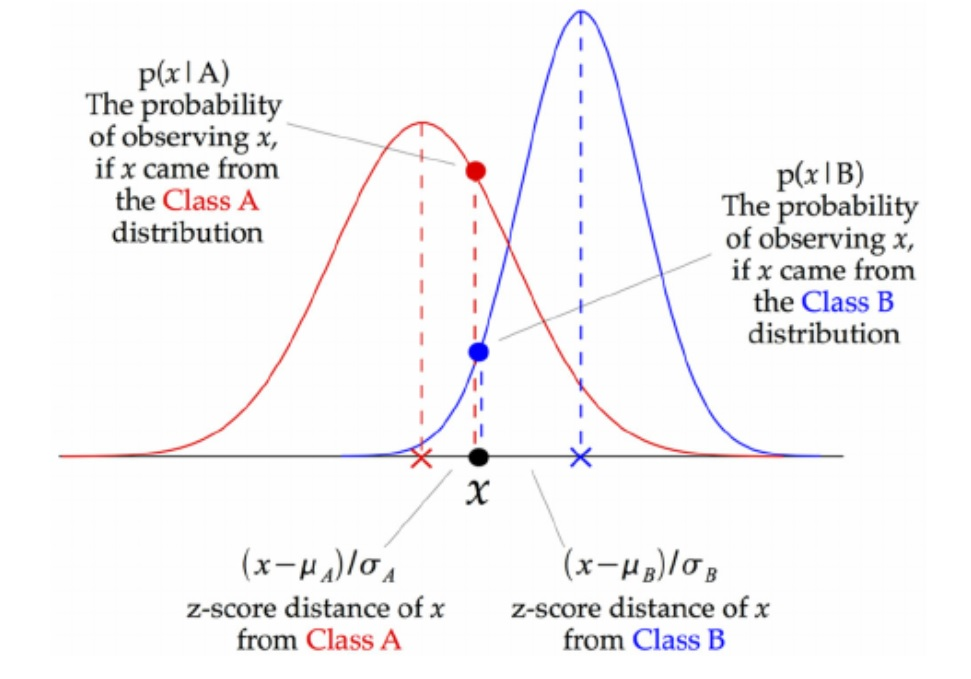

In [6]:
## Upload image
from IPython.display import Image
Image(filename='/content/drive/MyDrive/machine_learning/naive_bayes/naive.jpg',width = 600, height = 400)

The above illustration indicates how a Gaussian Naive Bayes (GNB) classifier works. At every data point, the z-score distance between that point and each class-mean is calculated, namely the distance from the class mean divided by the standard deviation of that class.



## Advantages and disadvantages

Advantages:

- Simple, fast and effective.

- Gives good results with noisy data.

- Requires relatively few records to train, and also works well with large data sets.

- Easily provides the estimated probability for each prediction.

Disadvantages:

- Assumes independence between attributes, which is usually false.

- In general does not work well with numerical attributes, especially if there are many of them.

- The predicted ranking is more credible than the estimated probabilities. That is, we should rely more on the result 
 obtained rather than the numerical value 
 as a probability.

## Uploading of data in google colab

In [1]:
! pip install -q kaggle

In [4]:
from google.colab import files

Kaggle > account; and with the mouse go down to the API option. Click on the Create New API Token option, which will download a .json file that will allow us to connect to the Kaggle api.

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"davidlop","key":"e66c452fbf7dd4ecbe93f5b02defa863"}'}

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d himanshunakrani/naive-bayes-classification-data

  0% 0.00/2.02k [00:00<?, ?B/s]
100% 2.02k/2.02k [00:00<00:00, 2.00MB/s]


In [10]:
## Unzip the zip file

!unzip /content/naive-bayes-classification-data.zip

Archive:  /content/naive-bayes-classification-data.zip
  inflating: Naive-Bayes-Classification-Data.csv  


In [11]:
import pandas as pd

df = pd.read_csv('/content/Naive-Bayes-Classification-Data.csv')
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


## Exploratory data analysis

In [12]:
df.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

There are no missing values in the classes.

In [13]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In classification problems we often find that in our training dataset we have that one of the sample classes is a "minority" class, i.e. one for which we have very few samples. This causes an imbalance in the data we will use to train our machine.
It usually affects the algorithms in their process of generalising the information and hurts the minority classes.

There are a number of procedures we can use to correctly predict those minority classes that are under-represented in our data. Some of the methods consist of changing the data or the metric to be evaluated:

- Change the evaluation metric: we can use metrics that take more account of minority class data such as f1, sensitivity or precision.
- Sampling: There are basically two commonly accepted techniques.
The first is oversampling of the minority class: this consists of adding copies of the minority class to increase its weight in the total.
The second is sub-sampling of the majority class: this is based on de-sampling the majority class to try to balance the number of samples in each class.
- Generation of synthetic samples: in this case, using algorithms such as SMOTE, we are able to generate more samples of the minority class from the ones we already have.

On the other hand, there are other methods that I use a lot, although they are not as common as the previous ones.  These methods depend on the statistical model to be used:

- Use Boosting algorithms: these models by definition tend to focus on improving the errors they make. For example, in an XGBoost, by increasing the number of trees, we can correct the errors of the previous trees.
- Giving more weight to the minority class samples: algorithms such as logistic regression allow us to weight the elements according to their class. Giving more weight to the minority class elements will focus on fitting better to that class and thus predict better.
- Use Stacking algorithms and reinforcement learning algorithms: in the same way as Boosting, these algorithms allow you to improve the minority class hits.

In this problem, we want to predict whether someone with a certain blood pressure and blood glucose will get diabetes. The diabetes class is not unbalanced as the mean is  ∼0.5  having two values,  0  and  1 .

In the graphs below you can see a certain division of the data, which gives us a basis for using a classification model.

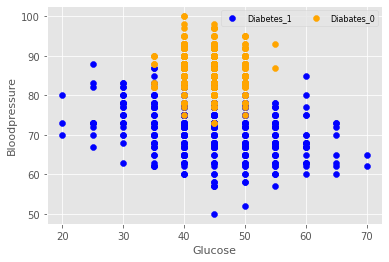

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df2 = df[df['diabetes']==1]
df3 = df[df['diabetes']==0]
d = plt.scatter(df2['glucose'], df2['bloodpressure'], color='blue', alpha=1)
f = plt.scatter(df3['glucose'], df3['bloodpressure'], color='orange', alpha=1)
plt.legend((d,f),
           ('Diabetes_1', 'Diabates_0'),
           scatterpoints=1,
           loc='upper right',
           ncol=5,
           fontsize=8)
plt.xlabel("Glucose", size=11) 
plt.ylabel("Bloodpressure", size=11)
plt.show()

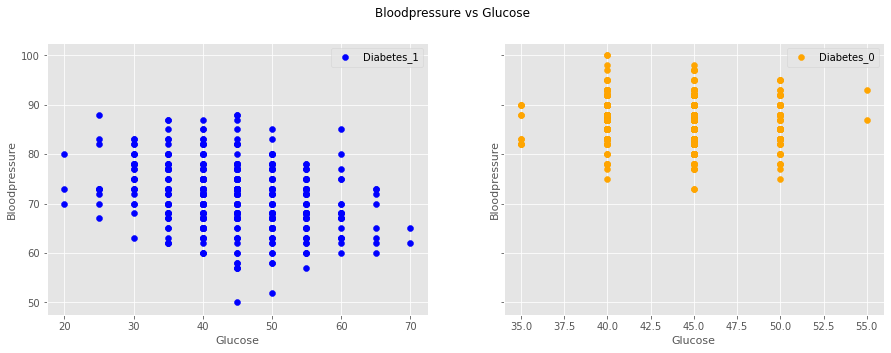

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Bloodpressure vs Glucose')

axes[0].scatter(df2['glucose'], df2['bloodpressure'], color='blue', alpha=1)
axes[0].set_xlabel("Glucose", size=11) 
axes[0].set_ylabel("Bloodpressure", size=11) 
axes[0].legend(["Diabetes_1"])

axes[1].scatter(df3['glucose'], df3['bloodpressure'], color='orange', alpha=1)
axes[1].set_xlabel("Glucose", size=11) 
axes[1].set_ylabel("Bloodpressure", size=11)
axes[1].legend(["Diabetes_0"])

We will now examine the distributions of the data to see if they meet the assumptions of the Naive Bayes (Gaussian) model.

Text(0.5, 0, 'Blood glucose units')

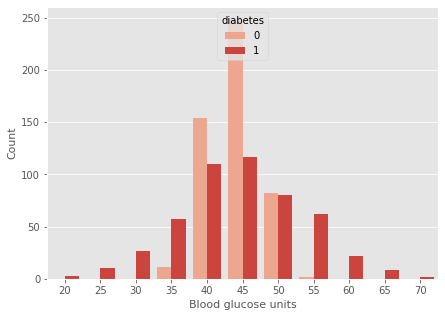

In [16]:
import seaborn as sns

data_df1 = df.groupby(['glucose','diabetes']).agg(count=('diabetes', 'count')) 
  
data_df1 = data_df1.reset_index() 

plt.figure(figsize=(7, 5)) 
sns.barplot(x="glucose", y="count", 
            hue="diabetes", data=data_df1, 
            palette='Reds') 
  
plt.ylabel("Count", size=11) 
plt.xlabel("Blood glucose units", size=11) 

Text(0.5, 0, 'Blood pressure')

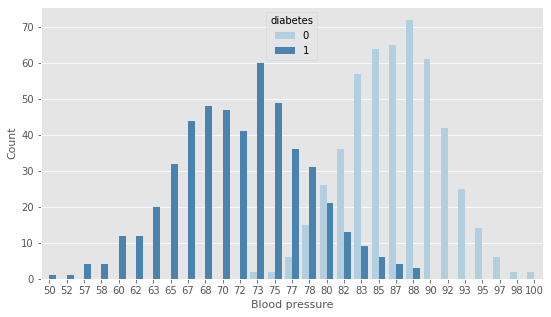

In [22]:
data_df2 = df.groupby(['bloodpressure','diabetes']).agg(count=('diabetes', 'count')) 
  
data_df2 = data_df2.reset_index() 

plt.figure(figsize=(9, 5)) 
sns.barplot(x="bloodpressure", y="count", 
            hue="diabetes", data=data_df2, 
            palette='Blues') 
  
plt.ylabel("Count", size=11) 
plt.xlabel("Blood pressure", size=11) 

It could be said that at first glance they appear to follow a normal distribution. We will use D'Agostino's K-squared test to check this.

D'Agostino's K-squared is a test used to analyse normality. The null hypothesis is that the data come from a normal distribution.

The p-value indicates the probability of obtaining data like the observed data if they really came from a population with a normal distribution with the same mean and variance as the observed data. Therefore, if the p-value is less than a certain value (typically 0.05), then there is sufficient evidence to reject normality.

In [58]:
k1, p_value_1 = stats.normaltest(df2['bloodpressure'])
print(f"Blood pressure - Diabetes 1, Estadístico = {k1}, p-value = {p_value_1}" )

k2, p_value_2 = stats.normaltest(df3['bloodpressure'])
print(f"Blood pressure - Diabetes 0, Estadístico = {k2}, p-value = {p_value_2}")

k3, p_value_3 = stats.normaltest(df2['glucose'])
print(f"Glucose - Diabetes 1, Estadístico = {k3}, p-value = {p_value_3}")

k4, p_value_4 = stats.normaltest(df3['glucose'])
print(f"Glucose - Diabetes 0, Estadístico = {k4}, p-value = {p_value_4}")

Blood pressure - Diabetes 1, Estadístico = 0.10101019680270804, p-value = 0.9507490813595664
Blood pressure - Diabetes 0, Estadístico = 0.36307437632514356, p-value = 0.8339872302740851
Glucose - Diabetes 1, Estadístico = 0.04836075288277897, p-value = 0.9761096266968992
Glucose - Diabetes 0, Estadístico = 3.156920846528596, p-value = 0.2062924569105675


None of the tests show evidence to reject the hypothesis that the data are normally distributed.

It is important to bear in mind that, as p-values, the larger the sample size, the more statistical power they have and the easier it is to find evidence against the null hypothesis of normality (our sample size is n=995). At the same time, the larger the sample size, the less sensitive parametric methods are to non-normality. For this reason, it is important not to base conclusions solely on the p-value of the test, but also to consider the graphical representation and the sample size.


## Gaussian Naive Nayes 





In [45]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [48]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9346733668341709

The model has an accuracy of 93% in predicting classes with the test data.

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        89
           1       0.94      0.95      0.94       110

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



The confusion matrix is where the set of possibilities between the correct class of an event, and its prediction, are collected. In order from left to right and from top to bottom: True positive, False positive, False negative and True negative.

In [52]:
print(confusion_matrix(Y_test, y_pred))

[[ 82   7]
 [  6 104]]


In [53]:
print(model.predict([[45, 100]]))

[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


For a glucose value of 45 and a blood pressure value of 100, the classifier associates diabetes class 0. 

## Parameters

SKlearn gives us few parameters for this model:

- priors: these are weights of our classes that we can pass to the algorithm, in case we do NOT have balanced classes. As many weights as classes to predict. For example, if we have less values of diabetes = 1, GaussianNB(priors=[0.4, 0.6]).
- var_smoothing: controls the variance (square root of the standard deviation) by increasing or decreasing it. If you increase the standard deviation in a normal distribution, the distribution will be more spread out and the peak of the distribution will be less sharp and less high. This effect will make your model fit better, but if you increase it too much, it can lead to overfitting problems (default 1e-9).